<a href="https://colab.research.google.com/github/sag005/CSE291-Text-Mining/blob/main/HW2_291.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/shangjingbo1226/AutoPhrase.git

Cloning into 'AutoPhrase'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 967 (delta 66), reused 124 (delta 60), pack-reused 830
Receiving objects: 100% (967/967), 199.80 MiB | 20.17 MiB/s, done.
Resolving deltas: 100% (438/438), done.


In [ ]:
cd AutoPhrase

/content/AutoPhrase


## QUESTION 2.A

In [3]:
!./auto_phrase.sh

===Compilation===
mkdir -p bin
g++ -std=c++11 -Wall -O3 -msse2  -fopenmp  -I.. -pthread -lm -Wno-unused-result -Wno-sign-compare -Wno-unused-variable -Wno-parentheses -Wno-format -o bin/segphrase_train src/main.cpp
g++ -std=c++11 -Wall -O3 -msse2  -fopenmp  -I.. -pthread -lm -Wno-unused-result -Wno-sign-compare -Wno-unused-variable -Wno-parentheses -Wno-format -o bin/segphrase_segment src/segment.cpp
===Downloading Toy Dataset===
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198M  100  198M    0     0  6759k      0  0:00:30  0:00:30 --:--:-- 7430k
===Tokenization===

real	4m59.291s
user	7m45.354s
sys	0m16.198s
Detected Language: EN
Current step: Tokenizing wikipedia phrases...
No provided expert labels.
===Part-Of-Speech Tagging===
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spen

### QUESTION 2.C

In [4]:
! ./phrasal_segmentation.sh

===Compilation===
===Tokenization===

real	1m30.573s
user	2m14.936s
sys	0m12.810s
Detected Language: EN
===Part-Of-Speech Tagging===

===Phrasal Segmentation===
=== Current Settings ===
Segmentation Model Path = models/DBLP/segmentation.model
After the phrasal segmentation, only following phrases will be highlighted with <phrase> and </phrase>
	Q(multi-word phrases) >= 0.500000
	Q(single-word phrases) >= 0.800000
POS guided model loaded.
# of loaded patterns = 715677
# of loaded truth patterns = 234490
POS transition matrix loaded
Phrasal segmentation finished.
   # of total highlighted quality phrases = 25249185
   # of total processed sentences = 13186794
   avg highlights per sentence = 1.91473

real	5m12.408s
user	5m4.590s
sys	0m5.840s
===Generating Output===

real	1m45.289s
user	1m42.873s
sys	0m5.006s


In [5]:
import re
import csv
from tqdm import tqdm

file_path = '/content/AutoPhrase/models/DBLP/segmentation.txt'
output_file = 'output.csv'

# Open the text file and CSV file
with open(file_path, 'r') as file, open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    extracted_texts = []
    text_with_score = {}
    # with tqdm(total=len(list(file)), desc='Processing') as pbar:
    for line in file:
        pattern = r'<phrase_([^>]+)>(.*?)<\/phrase>'
        extracted_text = re.findall(pattern, line)


        extracted_line_texts = []
        for tag_info in extracted_text:
            tag_content = tag_info[1].strip()
            words = tag_content.split()  # Split the text into words
            joined_text = '_'.join(words)
            text_with_score[joined_text] = tag_info[0]
            extracted_line_texts.append(joined_text)
        
        if len(extracted_line_texts) > 0:
          extracted_texts.append(extracted_line_texts)
        # pbar.update(1)

    # Write the extracted texts to the CSV file
#     for line_texts in extracted_texts:
#         writer.writerow(line_texts)

# print(f"Processed text has been written to {output_file}.")


In [6]:
# extracted_texts.clear()
print(len(extracted_texts))
print(extracted_texts[:10])

2757451
[['OQL', 'C++', 'Extending', 'C++'], ['Transaction_Management', 'Multidatabase_Systems'], ['Overview'], ['Multimedia', 'Information'], ['Active', 'Database_Systems'], ['Object-Oriented', 'DBMSs', 'Early'], ['Distributed', 'Databases'], ['An_Object-Oriented', 'DBMS', 'War', 'Story', 'Developing', 'Genome', 'Mapping', 'Database', 'C++'], ['Cooperative', 'Multiuser'], ['Schema', 'Architecture', 'M', 'Multidatabase']]


In [7]:
file_path = '/content/AutoPhrase/models/DBLP/segmentation.txt'
pattern = r'<phrase_([^>]+)>(.*?)<\/phrase>'
# Open the text file
with open(file_path, 'r') as file:
    # Read the first two lines
    line1 = file.readline()
    extracted_text = re.findall(pattern, line1)
    print(extracted_text)
    line2 = file.readline()
    extracted_text = re.findall(pattern, line2)
    print(extracted_text)
    line3 = file.readline()
    extracted_text = re.findall(pattern, line3)
    print(extracted_text)
    line4 = file.readline()
    extracted_text = re.findall(pattern, line4)
    print(extracted_text)
    line5 = file.readline()
    extracted_text = re.findall(pattern, line5)
    print(extracted_text)
    line6 = file.readline()
    extracted_text = re.findall(pattern, line6)
    print(extracted_text)

# Print the first two lines
print(line1)
print(line2)
print(line3)
print(line4)
print(line5)
print(line6)


[('Q=0.841', 'OQL'), ('Q=1.000', 'C++'), ('Q=0.827', 'Extending'), ('Q=1.000', 'C++')]
[]
[('Q=0.934', 'Transaction Management'), ('Q=0.898', 'Multidatabase Systems')]
[]
[('Q=0.836', 'Overview')]
[]
<phrase_Q=0.841>OQL</phrase>[<phrase_Q=1.000>C++</phrase>]: <phrase_Q=0.827>Extending</phrase> <phrase_Q=1.000>C++</phrase> with an Object Query Capability.

.

<phrase_Q=0.934>Transaction Management</phrase> in <phrase_Q=0.898>Multidatabase Systems</phrase>.

.

<phrase_Q=0.836>Overview</phrase> of the ADDS System.

.



In [8]:
!pip install gensim -U
import nltk
nltk.download('stopwords')

import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing
from collections import defaultdict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import gensim
import torch

# Set the GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Set TensorFlow to use GPU
# tf.config.experimental.set_visible_devices(tf.config.experimental.list_physical_devices('GPU')[0], 'GPU')

# Train Word2Vec model using TensorFlow
# model = gensim.models.Word2Vec(extracted_texts, vector_size=100, window=5, min_count=20, workers=4, epochs=10, sg=1, compute_loss=True)

# Access the trained word vectors
# word_vectors = model.wv


cpu


In [14]:
import multiprocessing
from gensim.models import Word2Vec

def train_w2v(sentences):
    cores = multiprocessing.cpu_count()
    print(cores)
    w2v_model = Word2Vec(min_count=10,
                     window=5,
                     vector_size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4)
    
    w2v_model.build_vocab(extracted_texts, progress_per=10000)
    w2v_model.train(extracted_texts, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)
    return w2v_model

In [18]:
model = train_w2v(extracted_texts)

2


## Question 2.D

In [19]:
from sklearn.cluster import KMeans
word_vectors = model.wv

# Get vocabulary
vocab = list(word_vectors.key_to_index.keys())

# Generate word embeddings
embeddings = [word_vectors[word] for word in vocab]

# Perform K-means clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

# Analyze the clusters
clusters = {}
for word, label in zip(vocab, cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(word)

for label, words in clusters.items():
    print(f"Cluster {label}: {words}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: ['paper', 'design', 'information', 'software', 'most', 'research', 'learning', 'knowledge', 'environment', 'mobile', 'technology', 'security', 'service', 'search', 'effective', 'language', 'modeling', 'human', 'evaluation', 'Internet', 'database', 'Web', 'part', 'management', 'area', 'practical', 'semantic', 'project', 'group', 'basic', 'XML', 'testing', 'digital', 'virtual', 'online', 'integration', 'major', 'variety', 'business', 'prototype', 'multimedia', 'programming', 'interactive', 'agent', 'understanding', 'semantics', 'functional', 'Java', 'web', 'building', 'literature', 'integrated', 'evolution', 'developing', 'e', 'nature', 'automatic', 'generation', 'community', 'recent', 'self', 'verification', 'infrastructure', 'formal', 'social', 'game', 'languages', 'monitoring', 'feedback', 'visualization', 'art', 'retrieval', 'paradigm', 'databases', 'towards', 'improving', 'production', 'supporting', 'generic', 'open', 'report', 'Grid', 'planning', 'ontology', 'abstract', 

In [40]:
score_cluster_data_kmean = []
for label, words in clusters.items():
  for word in words:
    score = text_with_score[word]
    match = re.search(r"Q=([\d.]+)", score)
    score_val = 0.0
    if match:
      score_val = float(match.group(1))
    datum = (label, word, score_val)
    score_cluster_data_kmean.append(datum)

# Convert tuple to dataframe
df = pd.DataFrame(score_cluster_data_kmean, columns=['label', 'word', 'score'])
df.reset_index(drop = True, inplace = True)
# # Display the dataframe
sorted_df = df.groupby('label').apply(lambda x: x.sort_values('score', ascending=False))
sorted_df.reset_index(drop = True, inplace = True)
# # Print top 20 rows for each group
top_20 = top_20_per_group = sorted_df.groupby('label').head(20)
print(top_20.to_string(index=False))

 label                           word  score
     0                          model    1.0
     0         Reinforcement_learning    1.0
     0                  curve_fitting    1.0
     0                 ovarian_cancer    1.0
     0                       halftone    1.0
     0                       thalamus    1.0
     0                  psychophysics    1.0
     0              integral_equation    1.0
     0                induction_motor    1.0
     0                    solid_angle    1.0
     0          linear_transformation    1.0
     0             diffusion_equation    1.0
     0              electrocardiogram    1.0
     0                    capillaries    1.0
     0                         shader    1.0
     0                  blood_glucose    1.0
     0                        Fresnel    1.0
     0                   lookup_table    1.0
     0                            VOI    1.0
     0                    motion_blur    1.0
     1                          paper    1.0
     1    

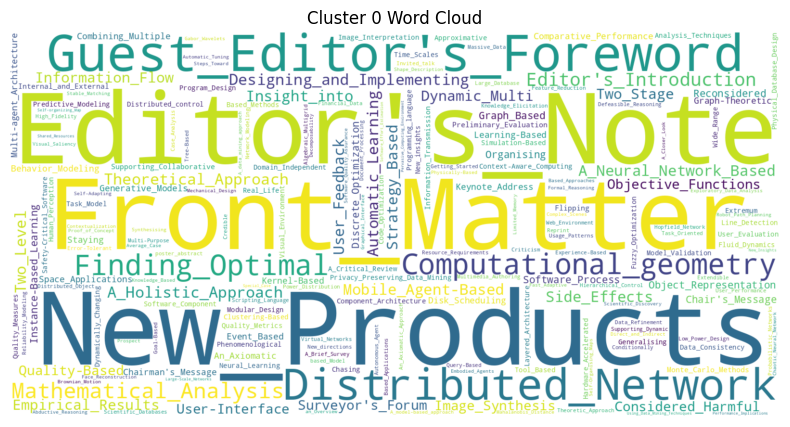

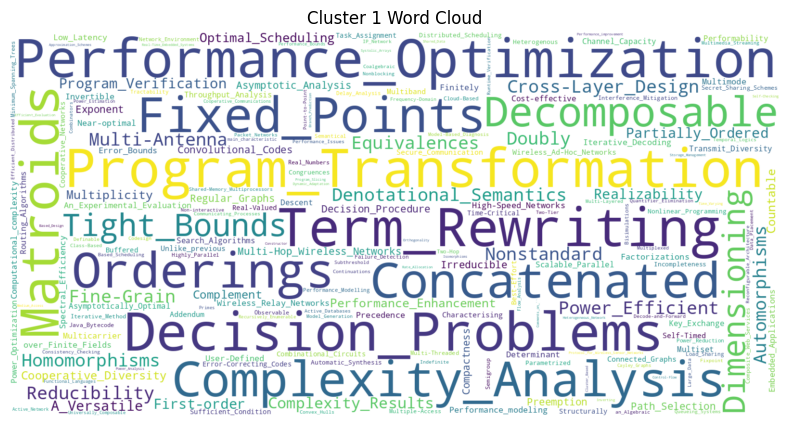

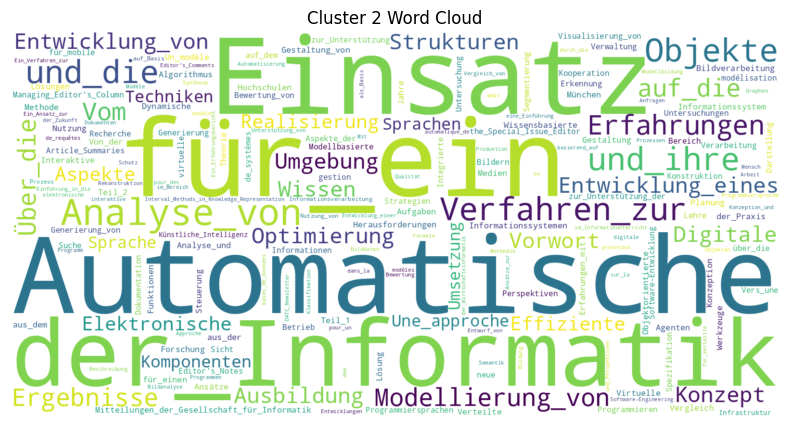

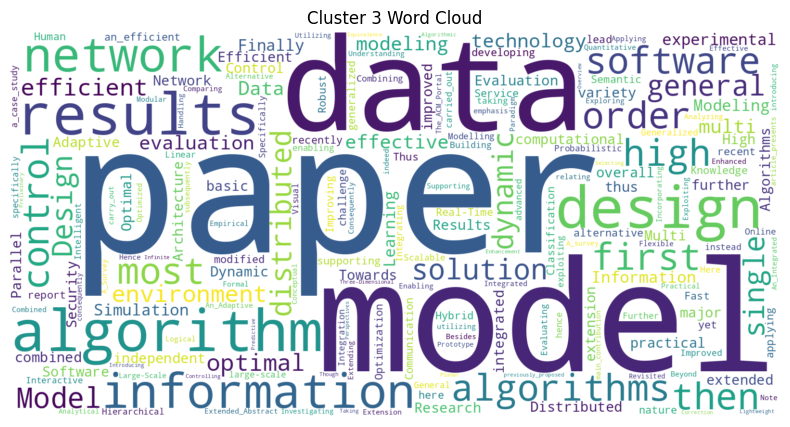

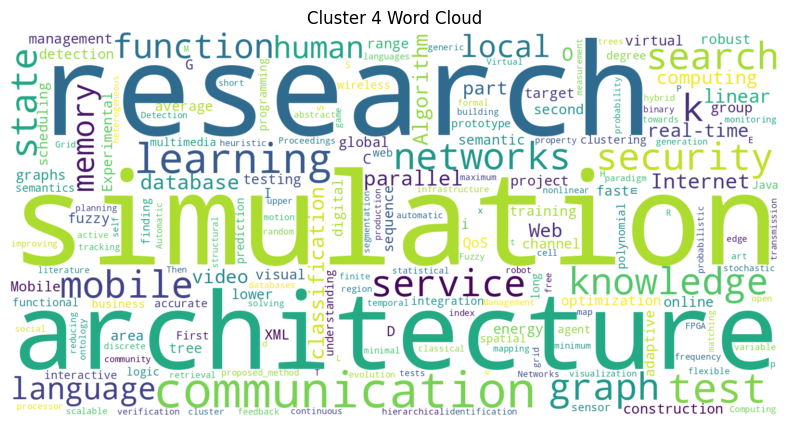

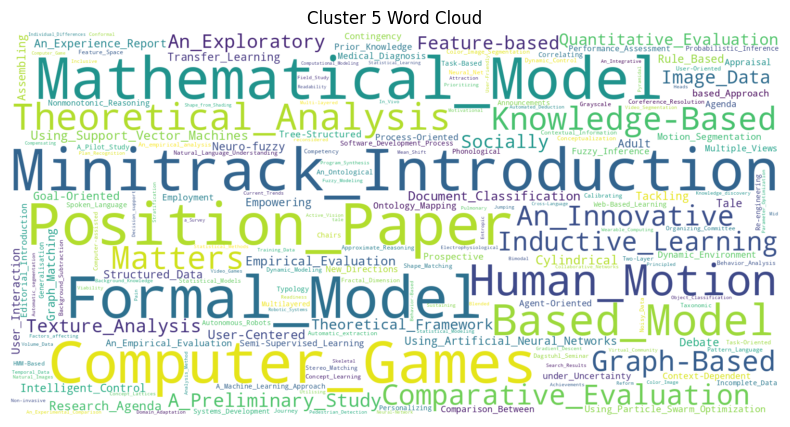

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in range(6):
    cluster_words = [word for word, cluster_label in zip(vocab, cluster_labels) if cluster_label == label]
    cluster_word_freq = {word: cluster_words.count(word) for word in cluster_words}

    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(cluster_word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label} Word Cloud')
    plt.axis('off')
    plt.show()

## Name of the categories/clusters: K-Means

Based on the word cloud we propose below cluster names:

1.   Publications(Mostly AI/ML related)
2.   Algorithms
3.   German vocab
4.   Data science literature
5.   Hardware/ Silicon architectures and performances
6.   RL/Deep Learning based COmputer Vision



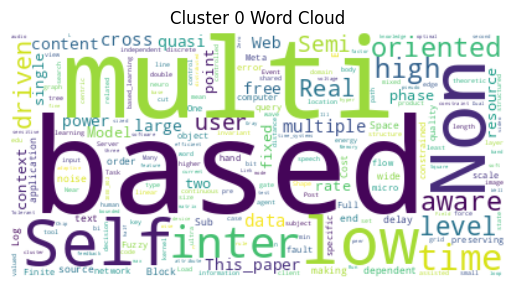

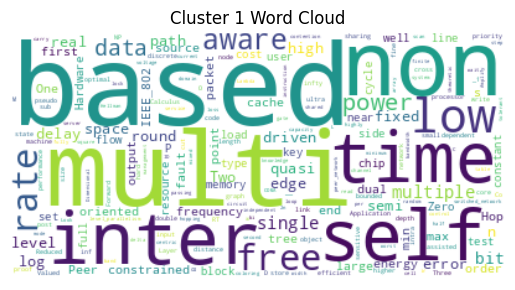

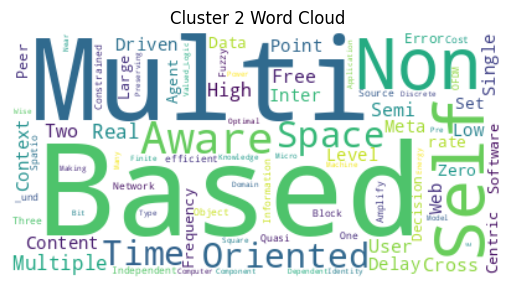

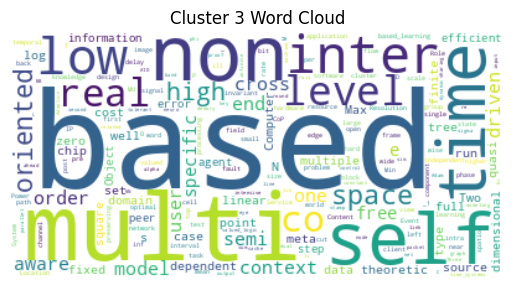

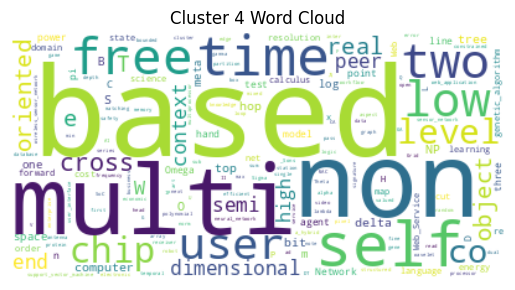

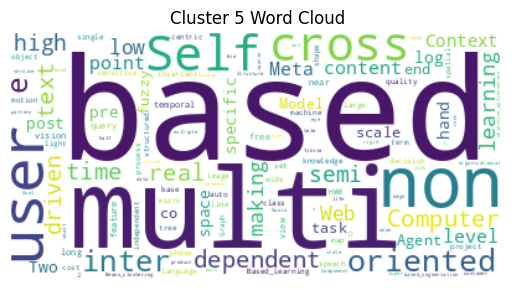

In [41]:
from sklearn.mixture import GaussianMixture

# Perform GMM clustering
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(model.wv.vectors)
cluster_labels = gmm.predict(model.wv.vectors)
clusters = {}
# Create word cloud for each cluster
for cluster_id in range(6):
    # Get words belonging to the cluster
    cluster_words = [word for word, label in zip(model.wv.key_to_index, cluster_labels) if label == cluster_id]
    clusters[cluster_id] = cluster_words

    # Create word cloud
    wordcloud = WordCloud(background_color='white').generate(' '.join(cluster_words))

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_id} Word Cloud")
    plt.axis('off')
    plt.show()

## Cluster Names - GMM
1.  RL
2.  Pulications in CS
3.  Software
4.  tpoics in ML content
5.  Silicon performance
6.  Model training

In [42]:
score_cluster_data_GMM = []
for label, words in clusters.items():
  for word in words:
    score = text_with_score[word]
    match = re.search(r"Q=([\d.]+)", score)
    score_val = 0.0
    if match:
      score_val = float(match.group(1))
    datum = (label, word, score_val)
    score_cluster_data_kmean.append(datum)

# Convert tuple to dataframe
df = pd.DataFrame(score_cluster_data_kmean, columns=['label', 'word', 'score'])
df.reset_index(drop = True, inplace = True)
# # Display the dataframe
sorted_df = df.groupby('label').apply(lambda x: x.sort_values('score', ascending=False))
sorted_df.reset_index(drop = True, inplace = True)
# # Print top 20 rows for each group
top_20 = top_20_per_group = sorted_df.groupby('label').head(20)
print(top_20.to_string(index=False))

 label                                 word  score
     0                                model    1.0
     0                   Metabolic_Syndrome    1.0
     0             generalized_linear_model    1.0
     0                    RNA_polymerase_II    1.0
     0                            Stevenson    1.0
     0                       parallelepiped    1.0
     0                          wind_tunnel    1.0
     0               Bibliographic_Database    1.0
     0                          Color_Gamut    1.0
     0                            Subfamily    1.0
     0               Pseudomonas_aeruginosa    1.0
     0                          triple-play    1.0
     0                               MHEG-5    1.0
     0                                pedal    1.0
     0                        Noise_Control    1.0
     0                             Puppetry    1.0
     0                       photoreceptors    1.0
     0                           plane_wave    1.0
     0                         

In [43]:
len(text_with_score)

444726

In [44]:
import pickle
file_path = 'data_with_score.pkl'

# Write the dictionary to the pickle file
with open(file_path, 'wb') as f:
    pickle.dump(text_with_score, f)